# DIVVY'IN UP DATA

    Initial steps/organization

In [106]:
# Import Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import scipy.stats as stats

In [2]:
# Import data file
divvy_df = pd.read_csv('Divvy_Trips_2019_Q3.csv')
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [3]:
divvy_df.shape

(1640718, 12)

In [4]:
# Remove null rows
divvy_df.dropna(inplace=True)
divvy_df.shape

divvy_df

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
5,23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0
18,23479406,2019-07-01 00:06:51,2019-07-01 00:26:22,2758,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0
20,23479408,2019-07-01 00:08:24,2019-07-01 00:20:07,2447,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0
21,23479409,2019-07-01 00:08:40,2019-07-01 00:27:50,6336,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1640713,25223635,2019-09-30 23:56:27,2019-10-01 00:06:20,5690,593.0,84,Milwaukee Ave & Grand Ave,134,Peoria St & Jackson Blvd,Subscriber,Male,1993.0
1640714,25223636,2019-09-30 23:57:02,2019-10-01 00:02:13,5079,310.0,268,Lake Shore Dr & North Blvd,85,Michigan Ave & Oak St,Subscriber,Male,1992.0
1640715,25223637,2019-09-30 23:57:45,2019-10-01 00:01:41,5535,235.0,423,University Ave & 57th St,426,Ellis Ave & 60th St,Customer,Male,2000.0
1640716,25223638,2019-09-30 23:57:47,2019-10-01 00:04:41,6120,414.0,110,Dearborn St & Erie St,31,Franklin St & Chicago Ave (Temp),Subscriber,Male,1986.0


In [5]:
# Convert birthyear to age
divvy_df['age'] = (2019 - divvy_df['birthyear'])
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,27.0
5,23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0,29.0
18,23479406,2019-07-01 00:06:51,2019-07-01 00:26:22,2758,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0,24.0
20,23479408,2019-07-01 00:08:24,2019-07-01 00:20:07,2447,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0,49.0
21,23479409,2019-07-01 00:08:40,2019-07-01 00:27:50,6336,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0,26.0


In [6]:
# Create bins for age
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Create the names for the five bins
group_names = ["11-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]
divvy_df["Age Group"] = pd.cut(divvy_df["age"], bins, labels=group_names, include_lowest=True)
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,Age Group
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,27.0,20-29
5,23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0,29.0,20-29
18,23479406,2019-07-01 00:06:51,2019-07-01 00:26:22,2758,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0,24.0,20-29
20,23479408,2019-07-01 00:08:24,2019-07-01 00:20:07,2447,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0,49.0,40-49
21,23479409,2019-07-01 00:08:40,2019-07-01 00:27:50,6336,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0,26.0,20-29


In [7]:
divvy_df['time difference'] = ((pd.to_datetime(divvy_df['end_time']) - 
                            pd.to_datetime(divvy_df['start_time']))
                                .dt.total_seconds() / 60)
divvy_df

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,Age Group,time difference
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,27.0,20-29,20.233333
5,23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0,29.0,20-29,5.166667
18,23479406,2019-07-01 00:06:51,2019-07-01 00:26:22,2758,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0,24.0,20-29,19.516667
20,23479408,2019-07-01 00:08:24,2019-07-01 00:20:07,2447,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0,49.0,40-49,11.716667
21,23479409,2019-07-01 00:08:40,2019-07-01 00:27:50,6336,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0,26.0,20-29,19.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640713,25223635,2019-09-30 23:56:27,2019-10-01 00:06:20,5690,593.0,84,Milwaukee Ave & Grand Ave,134,Peoria St & Jackson Blvd,Subscriber,Male,1993.0,26.0,20-29,9.883333
1640714,25223636,2019-09-30 23:57:02,2019-10-01 00:02:13,5079,310.0,268,Lake Shore Dr & North Blvd,85,Michigan Ave & Oak St,Subscriber,Male,1992.0,27.0,20-29,5.183333
1640715,25223637,2019-09-30 23:57:45,2019-10-01 00:01:41,5535,235.0,423,University Ave & 57th St,426,Ellis Ave & 60th St,Customer,Male,2000.0,19.0,11-19,3.933333
1640716,25223638,2019-09-30 23:57:47,2019-10-01 00:04:41,6120,414.0,110,Dearborn St & Erie St,31,Franklin St & Chicago Ave (Temp),Subscriber,Male,1986.0,33.0,30-39,6.900000


In [8]:
# Convert date columns to datetime format
divvy_df['start_time'] = pd.to_datetime(divvy_df['start_time'])
divvy_df['end_time'] = pd.to_datetime(divvy_df['end_time'])

In [9]:
# Split date from time and create columns
divvy_df['start_date'] = divvy_df['start_time'].dt.date
divvy_df['start_time'] = divvy_df['start_time'].dt.time
divvy_df['end_date'] = divvy_df['end_time'].dt.date
divvy_df['end_time'] = divvy_df['end_time'].dt.time
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,Age Group,time difference,start_date,end_date
0,23479388,00:00:27,00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,27.0,20-29,20.233333,2019-07-01,2019-07-01
5,23479393,00:02:21,00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0,29.0,20-29,5.166667,2019-07-01,2019-07-01
18,23479406,00:06:51,00:26:22,2758,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0,24.0,20-29,19.516667,2019-07-01,2019-07-01
20,23479408,00:08:24,00:20:07,2447,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0,49.0,40-49,11.716667,2019-07-01,2019-07-01
21,23479409,00:08:40,00:27:50,6336,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0,26.0,20-29,19.166667,2019-07-01,2019-07-01


In [11]:
# Organize columns in dataframe
divvy_df = divvy_df[["trip_id", "bikeid", "start_date", "start_time", "time difference", "end_date", "end_time", "tripduration", "from_station_id", "from_station_name", "to_station_id", "to_station_name", "usertype", "gender", "birthyear", "age", "Age Group"]]
divvy_df.head(10)

,trip_id,bikeid,start_date,start_time,time difference,end_date,end_time,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,Age Group
0,23479388,3591,2019-07-01,00:00:27,20.233333,2019-07-01,00:20:41,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,27.0,20-29
5,23479393,4941,2019-07-01,00:02:21,5.166667,2019-07-01,00:07:31,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0,29.0,20-29
18,23479406,2758,2019-07-01,00:06:51,19.516667,2019-07-01,00:26:22,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0,24.0,20-29
20,23479408,2447,2019-07-01,00:08:24,11.716667,2019-07-01,00:20:07,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0,49.0,40-49
21,23479409,6336,2019-07-01,00:08:40,19.166667,2019-07-01,00:27:50,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0,26.0,20-29
29,23479418,4525,2019-07-01,00:15:06,21.566667,2019-07-01,00:36:40,"1,294.0",240,Sheridan Rd & Irving Park Rd,326,Clark St & Leland Ave,Customer,Male,1987.0,32.0,30-39
30,23479419,1132,2019-07-01,00:18:53,27.066667,2019-07-01,00:45:57,"1,624.0",6,Dusable Harbor,321,Wabash Ave & 9th St,Customer,Female,1998.0,21.0,20-29
31,23479420,5166,2019-07-01,00:18:53,27.016667,2019-07-01,00:45:54,"1,621.0",6,Dusable Harbor,321,Wabash Ave & 9th St,Customer,Female,1997.0,22.0,20-29
32,23479421,240,2019-07-01,00:19:41,26.216667,2019-07-01,00:45:54,"1,573.0",6,Dusable Harbor,321,Wabash Ave & 9th St,Customer,Female,1997.0,22.0,20-29
34,23479423,1830,2019-07-01,00:22:56,16.716667,2019-07-01,00:39:39,"1,003.0",203,Western Ave & 21st St,203,Western Ave & 21st St,Subscriber,Male,1970.0,49.0,40-49


# Bike Usage

In [12]:
# Number of unique bikes in circulation
divvy_df['bikeid'].nunique()

5783

In [13]:
# Bike IDs with most activity
divvy_df['bikeid'].value_counts()

5344    462
3770    457
717     453
5634    445
3333    443
       ... 
5098      1
6254      1
1806      1
2292      1
3310      1
Name: bikeid, Length: 5783, dtype: int64

In [14]:
popularbikes_average = divvy_df['bikeid'].value_counts().mean()
popularbikes_average

234.02524641189694

In [15]:
max_duration = divvy_df['time difference'].max()
max_duration

150943.9

In [16]:
min_duration = divvy_df['time difference'].min()
min_duration

1.0166666666666668

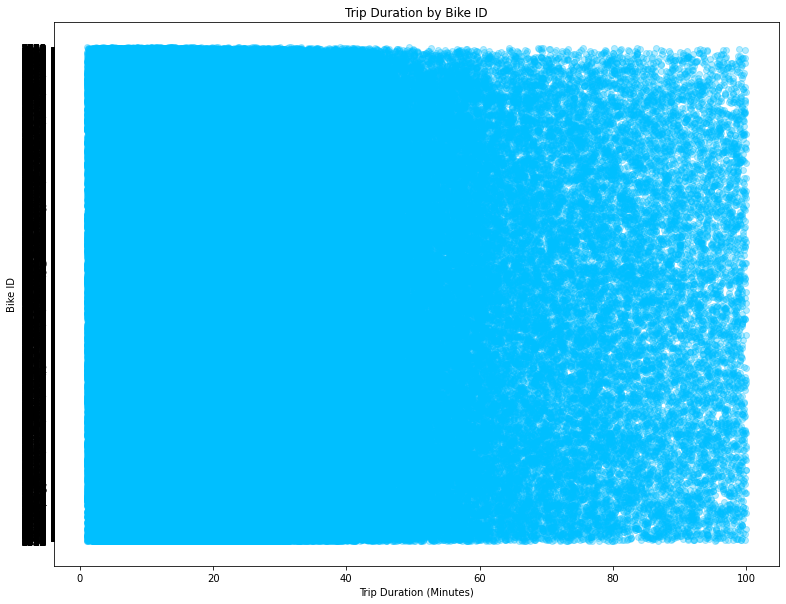

In [98]:
plt.figure(figsize=(13,10))
plt.scatter(abridged_duration['time difference'], abridged_duration['bikeid'], color="deepskyblue", alpha = .3, edgecolors='deepskyblue')
plt.title("Trip Duration by Bike ID")
plt.xlabel("Trip Duration (Minutes)")
plt.ylabel("Bike ID")
plt.show()

In [92]:
abridged_duration = divvy_df.loc[divvy_df['time difference']<=100]
abridged_duration

,trip_id,bikeid,start_date,start_time,time difference,end_date,end_time,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,Age Group
0,23479388,3591,2019-07-01,00:00:27,20.233333,2019-07-01,00:20:41,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,27.0,20-29
5,23479393,4941,2019-07-01,00:02:21,5.166667,2019-07-01,00:07:31,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0,29.0,20-29
18,23479406,2758,2019-07-01,00:06:51,19.516667,2019-07-01,00:26:22,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0,24.0,20-29
20,23479408,2447,2019-07-01,00:08:24,11.716667,2019-07-01,00:20:07,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0,49.0,40-49
21,23479409,6336,2019-07-01,00:08:40,19.166667,2019-07-01,00:27:50,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0,26.0,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640713,25223635,5690,2019-09-30,23:56:27,9.883333,2019-10-01,00:06:20,593.0,84,Milwaukee Ave & Grand Ave,134,Peoria St & Jackson Blvd,Subscriber,Male,1993.0,26.0,20-29
1640714,25223636,5079,2019-09-30,23:57:02,5.183333,2019-10-01,00:02:13,310.0,268,Lake Shore Dr & North Blvd,85,Michigan Ave & Oak St,Subscriber,Male,1992.0,27.0,20-29
1640715,25223637,5535,2019-09-30,23:57:45,3.933333,2019-10-01,00:01:41,235.0,423,University Ave & 57th St,426,Ellis Ave & 60th St,Customer,Male,2000.0,19.0,11-19
1640716,25223638,6120,2019-09-30,23:57:47,6.900000,2019-10-01,00:04:41,414.0,110,Dearborn St & Erie St,31,Franklin St & Chicago Ave (Temp),Subscriber,Male,1986.0,33.0,30-39


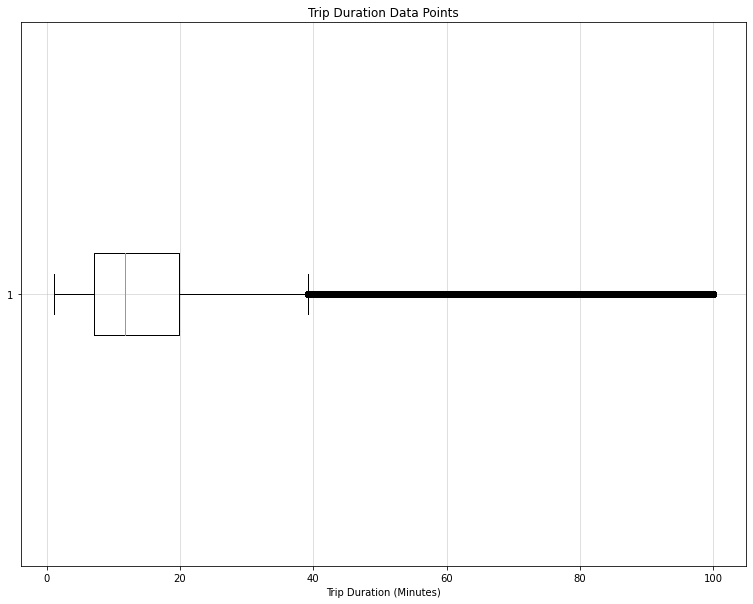

In [95]:
plt.figure(figsize=(13,10))
plt.boxplot(abridged_duration['time difference'], vert=False)
plt.title("Trip Duration Data Points")
plt.xlabel("Trip Duration (Minutes)")
plt.grid(True, alpha=.5)
plt.show()

In [103]:
#TTEST
def gendata(loc=0):
    duration_sample = abridged_duration['time difference']
    duration_all = divvy_df['time difference']
    
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(duration_all)), duration_all, label="trip duration")
    plt.scatter(range(len(duration_sample)), duration_sample, label="sample duration")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(duration_all, 20, density=True, alpha=0.7, label="trip duration")
    plt.hist(duration_sample, 20, density=True, alpha=0.7, label="sample duration")
    plt.axvline(duration_all.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(duration_sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return duration_all, duration_sample


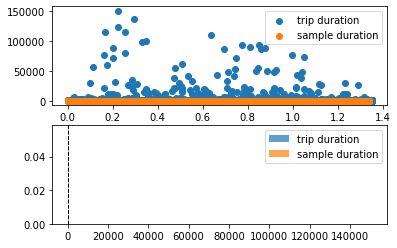

In [104]:
duration_all, duration_sample = gendata()

In [107]:
stats.ttest_1samp(duration_sample, duration_all.mean())

Ttest_1sampResult(statistic=-482.94414015580026, pvalue=0.0)

In [33]:
popular_bikes = divvy_df['bikeid'].value_counts().head(20)
popular_bikes

5344    462
3770    457
717     453
5634    445
3333    443
6425    442
5724    441
522     436
682     434
6079    434
4638    431
4500    431
4877    430
4781    430
3115    428
5501    427
244     426
3088    425
5306    425
2741    423
Name: bikeid, dtype: int64

In [34]:
popular_bikes.mean()

436.15

# Most popular routes and stations

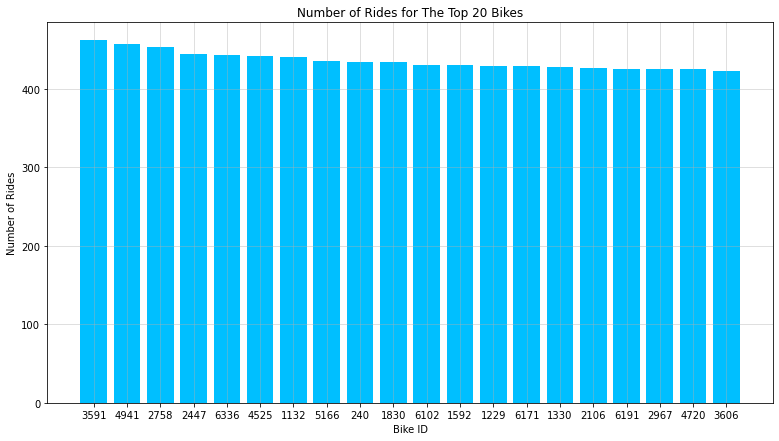

In [40]:
plt.figure(figsize=(13,7))
plt.bar(divvy_df['bikeid'].head(20), popular_bikes, color='deepskyblue')
plt.title("Number of Rides for The Top 20 Bikes")
plt.xlabel("Bike ID")
plt.ylabel("Number of Rides")
plt.grid(True, alpha=.5)

In [49]:
divvy_df['time difference'].mean()

21.024328428534265

In [50]:
divvy_df['time difference'].median()

11.85

In [51]:
divvy_df['time difference'].mode()

0    5.716667
dtype: float64

In [52]:
divvy_df['bikeid'] = divvy_df['bikeid'].astype(str)
divvy_df['bikeid'].dtypes

dtype('O')

In [53]:
# Most popular starting stations
divvy_df['from_station_name'].value_counts()

Canal St & Adams St             19106
Streeter Dr & Grand Ave         18363
Clinton St & Madison St         17965
Clinton St & Washington Blvd    16068
Lake Shore Dr & North Blvd      13944
                                ...  
Damen Ave & 59th St                 4
Rhodes Ave & 71st St                3
Racine Ave & 65th St                3
Racine Ave & 61st St                1
Carpenter St & 63rd St              1
Name: from_station_name, Length: 612, dtype: int64

In [54]:
# Most popular ending stations
divvy_df['to_station_name'].value_counts()

Streeter Dr & Grand Ave         20143
Lake Shore Dr & North Blvd      18248
Clinton St & Washington Blvd    17347
Canal St & Adams St             16149
Clinton St & Madison St         15792
                                ...  
Michigan Ave & 71st St              3
Rhodes Ave & 71st St                3
Damen Ave & 59th St                 3
Racine Ave & 61st St                1
Vincennes Ave & 75th St             1
Name: to_station_name, Length: 612, dtype: int64

In [56]:
# Most popular trips *still in-progress*
popular_stations = divvy_df.groupby(['from_station_name','to_station_name'])
popular_stations

# Usertype Breakdown- Subscriber vs Customer

In [57]:
# Groupby usertype for ridership breakdown
usertype_df = divvy_df.groupby('usertype')
usertype_df.count()

,trip_id,bikeid,start_date,start_time,time difference,end_date,end_time,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,gender,birthyear,age,Age Group
usertype,,,,,,,,,,,,,,,,
Customer,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214096
Subscriber,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1138932


In [58]:
#Find amount ot Subscribers and Customers
divvy_df['usertype'].value_counts()

Subscriber    1139252
Customer       214116
Name: usertype, dtype: int64

In [59]:
#Find Usertype Percentage

#Count number of trips for each usertype
count_number_usertype = divvy_df['trip_id'].nunique()

#Count number of each usertype
usertype_number = usertype_df['trip_id'].nunique()

#Percentage Usertype Calculation
percent_usertype =  usertype_number / count_number_usertype * 100

#Display usertype demographics
usertype_demographics_df = pd.DataFrame({'Total Count':usertype_number,
                                       'Percentage':percent_usertype})
usertype_demographics_df.sort_values('Total Count', ascending = False)

,Total Count,Percentage
usertype,,
Subscriber,1139252,84.179026
Customer,214116,15.820974


<u> **Usertype Observations:** </u>

*There are far more subscribers than customers who ride in the Chicago Divvy network, about 84% to 16%

# Gender Breakdown

In [60]:
#Find amount of Male and Female riders
divvy_df['gender'].value_counts()

Male      957353
Female    396015
Name: gender, dtype: int64

In [61]:
#Group by gender
usertype_gender_df = divvy_df.groupby('gender')

#Count number of trips for each gender
count_number_gender = divvy_df['trip_id'].nunique()

#Count number of each gender
gender_type_number = usertype_gender_df['trip_id'].nunique()

#Calculate percentage for gender
percent_gender =  gender_type_number / count_number_gender * 100

#Display gender demographics
gender_demographics_df = pd.DataFrame({'Total Count':gender_type_number,
                                       'Percentage':percent_gender})
gender_demographics_df.sort_values('Total Count', ascending = False)

,Total Count,Percentage
gender,,
Male,957353,70.738557
Female,396015,29.261443


Text(0.5, 1.0, 'Total Divvy Riders based on Gender')

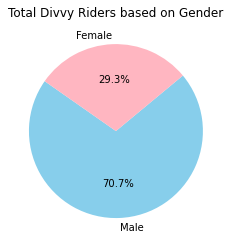

In [62]:
#Total Divvy Riders based on Gender- PIE CHART

gender_data = divvy_df['gender'].value_counts()
gender_labels = ['Male','Female']
colours = ['skyblue', 'lightpink']
plt.pie(gender_data, labels= gender_labels, colors=colours, autopct="%1.1f%%", startangle=145)
plt.title("Total Divvy Riders based on Gender")

In [63]:
# Find breakdown of each gender for each usertype
usertype_gender_df['usertype'].value_counts()

gender  usertype  
Female  Subscriber    313303
        Customer       82712
Male    Subscriber    825949
        Customer      131404
Name: usertype, dtype: int64

Text(0.5, 1.0, 'Total Divvy Riders based on Gender and Usertype')

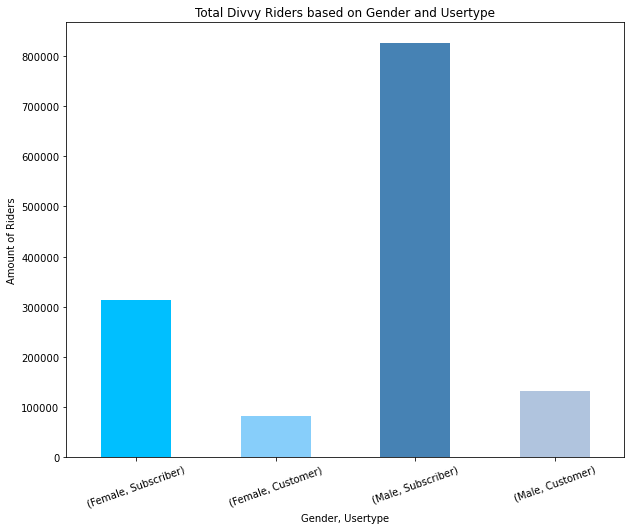

In [64]:
#Total Divvy Riders based on Gender and Usertype- Bar Graph
plt.figure(figsize=(10,8))
split_gender_data = usertype_gender_df['usertype'].value_counts()
blue_colors = ["deepskyblue", "lightskyblue", "steelblue", "lightsteelblue"]
gender_chart = split_gender_data.plot(kind = 'bar', color = blue_colors, rot = 20)
gender_chart.set_ylabel("Amount of Riders")
gender_chart.set_xlabel("Gender, Usertype")
gender_chart.set_title("Total Divvy Riders based on Gender and Usertype")

Text(0.5, 1.0, 'Total Divvy Riders based on Gender and Usertype')

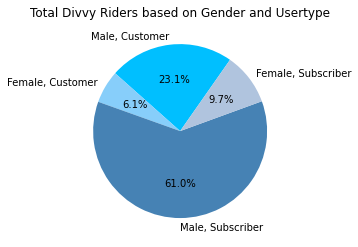

In [65]:
#Total Divvy Riders based on Gender and Usertype- Pie Chart

gender_by_usertype = usertype_gender_df['usertype'].value_counts()
gender_usertype_labels= ["Male, Customer", "Female, Customer", "Male, Subscriber", "Female, Subscriber"]
plt.pie(gender_by_usertype, labels = gender_usertype_labels, colors= blue_colors, autopct="%1.1f%%", startangle=55)
plt.title("Total Divvy Riders based on Gender and Usertype")

Text(0.5, 1.0, 'Divvy Riders based on Gender- Customers Only')

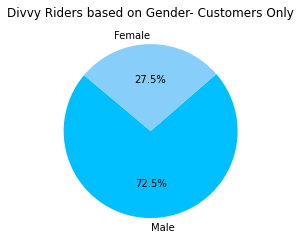

In [66]:
#Divvy Riders based on Gender- Customers Only

sizes = [825949,313303]
skyblue_colors = ["deepskyblue", "lightskyblue"]
plt.pie(sizes, labels= gender_labels, colors=skyblue_colors, autopct="%1.1f%%", startangle=140)
plt.title("Divvy Riders based on Gender- Customers Only")

Text(0.5, 1.0, 'Divvy Riders based on Gender- Subscribers Only')

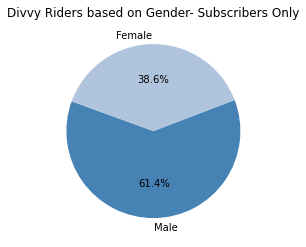

In [67]:
#Divvy Riders based on Gender- Subscribers Only

sizes = [131404,82712]
steel_colors = ["steelblue", "lightsteelblue"]
plt.pie(sizes, labels= gender_labels, colors=steel_colors, autopct="%1.1f%%", startangle=160)
plt.title("Divvy Riders based on Gender- Subscribers Only")

<u> **Gender Observations:** </u>

*There are far more male Divvy riders than female - about 70% to 30%.

*It is fairly the same gender breakdown when it comes to customer (about 70/30) and subscriber ( about 60/40).

# Age Breakdown

In [68]:
#Count number of trips for each age group
count_number_age = divvy_df['trip_id'].nunique()

#Count number in each age group and display
usertype_age_df = divvy_df.groupby('Age Group')
age_type_number = usertype_age_df['trip_id'].nunique()
usertype_age_df.count()

,trip_id,bikeid,start_date,start_time,time difference,end_date,end_time,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
Age Group,,,,,,,,,,,,,,,,
11-19,24148,24148,24148,24148,24148,24148,24148,24148,24148,24148,24148,24148,24148,24148,24148,24148
20-29,633811,633811,633811,633811,633811,633811,633811,633811,633811,633811,633811,633811,633811,633811,633811,633811
30-39,402889,402889,402889,402889,402889,402889,402889,402889,402889,402889,402889,402889,402889,402889,402889,402889
40-49,151754,151754,151754,151754,151754,151754,151754,151754,151754,151754,151754,151754,151754,151754,151754,151754
50-59,106465,106465,106465,106465,106465,106465,106465,106465,106465,106465,106465,106465,106465,106465,106465,106465
60-69,31272,31272,31272,31272,31272,31272,31272,31272,31272,31272,31272,31272,31272,31272,31272,31272
70-79,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656
80-89,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33


In [69]:
#Average Trip Duration
average_duration = usertype_age_df['tripduration'].count().mean()
average_duration

169128.5

Text(0.5, 1.0, 'Sum Trip Duration by Age Groups')

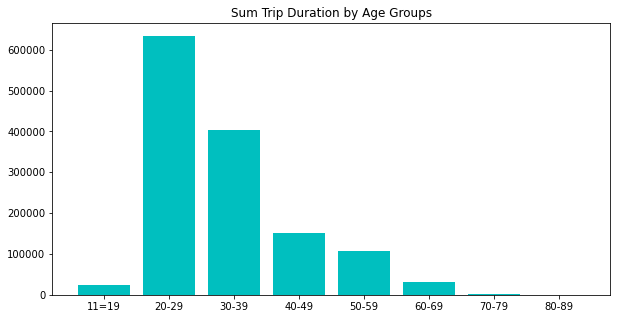

In [70]:
ages = ['11=19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
tripduration = [24148, 633811, 402889, 151754, 106465, 31272, 2656, 33]
plt.figure(figsize=(10,5))
plt.bar(ages, tripduration, color='c')
plt.title("Sum Trip Duration by Age Groups")

In [71]:
#Calculate percentage for age
percent_age =  age_type_number / count_number_age * 100

#Make df of age demographics
age_demographics_df = pd.DataFrame({'Total Count':age_type_number,
                                       'Percentage of Age':percent_age})
age_demographics_df.sort_values('Age Group', ascending = True)

,Total Count,Percentage of Age
Age Group,,
11-19,24148,1.784289
20-29,633811,46.832125
30-39,402889,29.769361
40-49,151754,11.213063
50-59,106465,7.866670
60-69,31272,2.310680
70-79,2656,0.196251
80-89,33,0.002438


Text(0.5, 1.0, 'Total Divvy Riders based on Age')

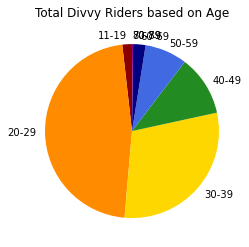

In [72]:
#Total Divvy Riders based on Age- Pie Chart

rainbow_colors = ["darkred", "darkorange", "gold", "forestgreen", "royalblue", "navy", "darkmagenta", "hotpink"]
plt.pie(percent_age, labels= group_names, colors=rainbow_colors, startangle=90)
#autopct="%1.1f%%"
plt.title("Total Divvy Riders based on Age")

Text(0.5, 1.0, 'Total Divvy Riders Based on Age')

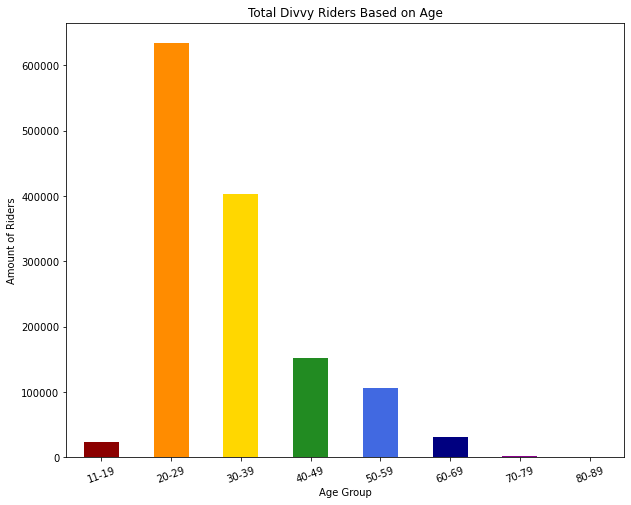

In [73]:
#Total Divvy Riders based on Age- Bar Chart
plt.figure(figsize=(10,8))
age_chart = age_type_number.plot(kind = 'bar', color = rainbow_colors, rot = 20)
age_chart.set_ylabel("Amount of Riders")
age_chart.set_xlabel("Age Group")
age_chart.set_title("Total Divvy Riders Based on Age")

Text(0.5, 1.0, 'Percentage Divvy Riders Based on Age')

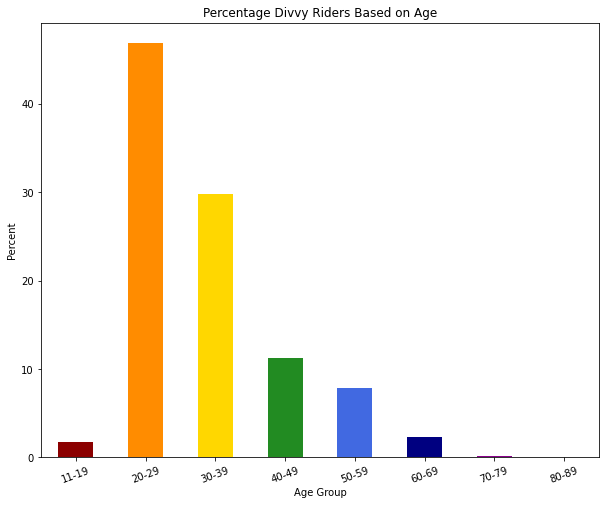

In [74]:
#Percentage Divvy Riders based on Age- Bar Chart
plt.figure(figsize=(10,8))
percent_chart = percent_age.plot(kind = 'bar', color = rainbow_colors, rot = 20)
percent_chart.set_ylabel("Percent")
percent_chart.set_xlabel("Age Group")
percent_chart.set_title("Percentage Divvy Riders Based on Age")

In [75]:
#Age seperated by usertype
usertype_age_df['usertype'].value_counts()

Age Group  usertype  
11-19      Subscriber     12093
           Customer       12055
20-29      Subscriber    512720
           Customer      121091
30-39      Subscriber    355281
           Customer       47608
40-49      Subscriber    132359
           Customer       19395
50-59      Subscriber     94713
           Customer       11752
60-69      Subscriber     29201
           Customer        2071
70-79      Subscriber      2535
           Customer         121
80-89      Subscriber        30
           Customer           3
Name: usertype, dtype: int64

Text(0.5, 1.0, 'Divvy Riders based on Age, Customers Only')

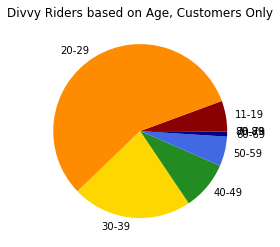

In [76]:
#Divvy Riders based on Age, Customers Only- PIE CHART

customer_age_totals = [12055,121091,47608,19395,11752,2071,121,3]
plt.pie(customer_age_totals, labels= group_names, colors=rainbow_colors)
#autopct="%1.1f%%"
#startangle=90
plt.title("Divvy Riders based on Age, Customers Only")

Text(0.5, 1.0, 'Divvy Riders based on Age, Subscribers Only')

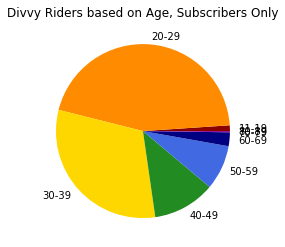

In [77]:
# Divvy Riders based on Age, Subscribers Only- PIE CHART

subscriber_age_totals = [12093,512720,355281,132359,94713,29201,2535,30]
plt.pie(subscriber_age_totals, labels= group_names, colors = rainbow_colors)
#startangle=90
#autopct="%1.1f%%",
plt.title("Divvy Riders based on Age, Subscribers Only")

Text(0, 0.5, 'Amount of Riders')

<Figure size 720x432 with 0 Axes>

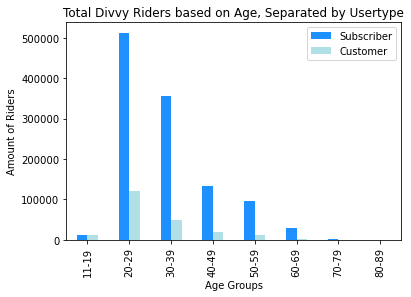

In [78]:
#Total Divvy Riders based on Age, Separated by Usertype- Histogram
plt.figure(figsize=(10,6))
plotdata = pd.DataFrame({
    "Subscriber":subscriber_age_totals,
    "Customer":customer_age_totals
    }, 
    index= group_names
    )
plotdata.plot(kind="bar", color = ['dodgerblue','powderblue'])
plt.title("Total Divvy Riders based on Age, Separated by Usertype")
plt.xlabel("Age Groups")
plt.ylabel("Amount of Riders")

Text(0, 0.5, 'Amount of Riders')

<Figure size 720x360 with 0 Axes>

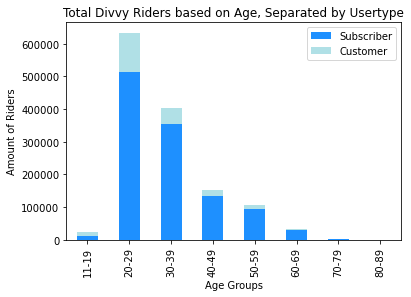

In [79]:
#Total Divvy Riders based on Age, Separated by Usertype- Stacked Histogram
plt.figure(figsize=(10,5))
plotdata[["Subscriber", "Customer"]].plot(kind="bar", color=['dodgerblue','powderblue'], stacked=True)
plt.title("Total Divvy Riders based on Age, Separated by Usertype")
plt.xlabel("Age Groups")
plt.ylabel("Amount of Riders")

Text(0, 0.5, 'Amount of Riders')

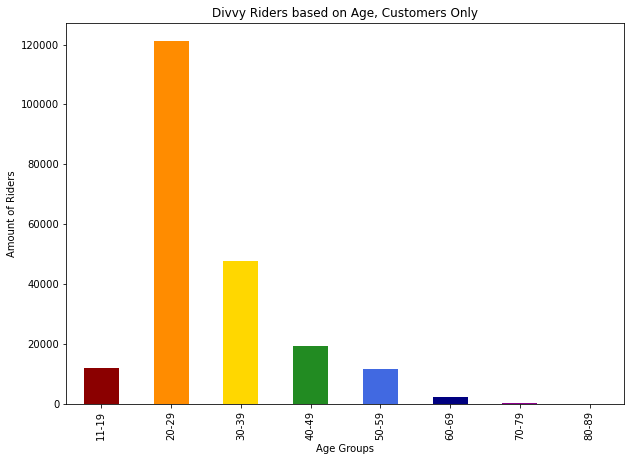

In [80]:
#Divvy Riders based on Age, Customers Only- BAR CHART
plt.figure(figsize=(10,7))
plotdata['Customer'].plot(kind="bar", color=rainbow_colors, title="test")
plt.title("Divvy Riders based on Age, Customers Only")
plt.xlabel("Age Groups")
plt.ylabel("Amount of Riders")

Text(0, 0.5, 'Amount of Riders')

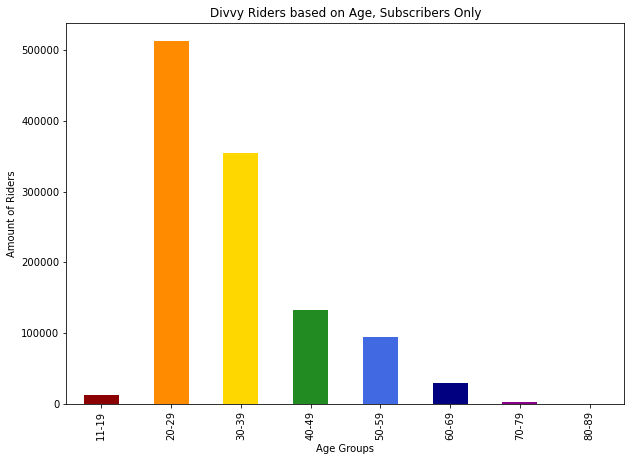

In [81]:
#Divvy Riders based on Age, Subscribers Only- BAR CHART
plt.figure(figsize=(10,7))
plotdata['Subscriber'].plot(kind="bar", color=rainbow_colors, title="test")
plt.title("Divvy Riders based on Age, Subscribers Only")
plt.xlabel("Age Groups")
plt.ylabel("Amount of Riders")

<u> **Age Observations:** </u>

*Age Group 20-29 has the highest amount of riders, with about 47% of all riders. Age Group 30-39 comes in second with almost 30%.

*It is a pretty standard breakdown of ages, as we expected. The distribution is fairly the same with customers only and subscribers only. 